# PART 1 - Temporal Patterns

*We start off by importing the packages we need for plotting and our dataframes*

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
sns.set()

df = pd.read_csv("rawdata/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

***Exercise 1.1***

*Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?*

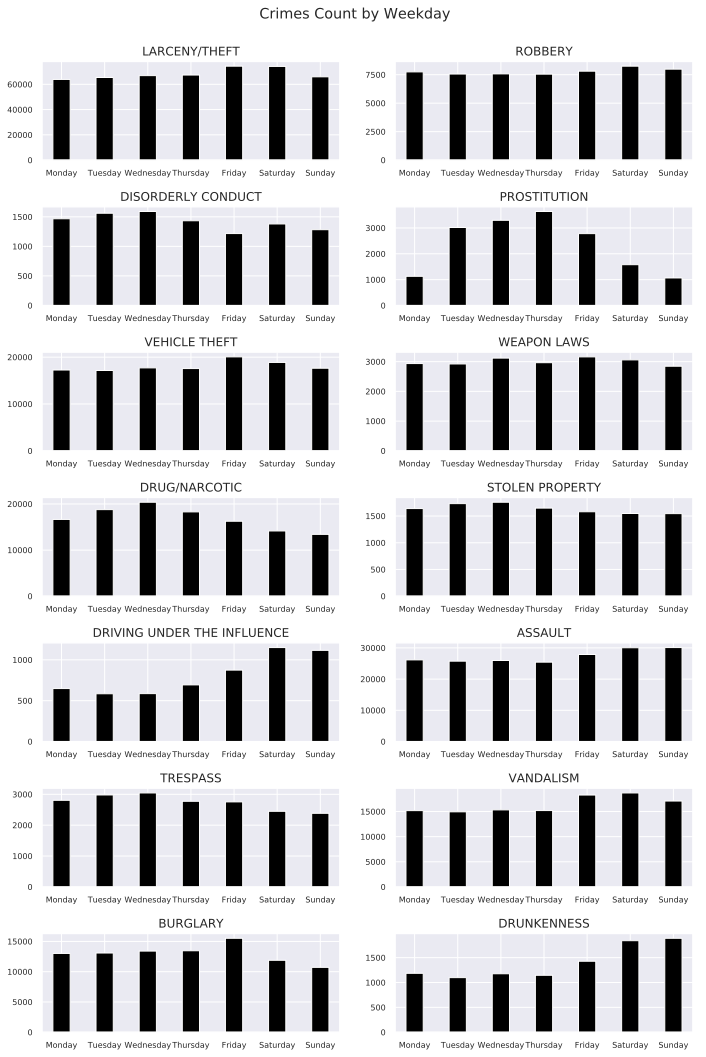

In [12]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,15))
fig.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.93)
fig.suptitle("Crimes Count by Weekday")

from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['DayOfWeek'] = df['DayOfWeek'].astype(cat_type)

for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    weekly_CT = df_CT.groupby(df_CT['DayOfWeek']).count()["PdId"]
    axs = weekly_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], width=0.4, fontsize=8, rot=0, legend=None, color="black")
    axs.xaxis.set_label_text("")
plt.show()

*Like suggested in the exercise, `PROSTITUTION` reached its highest in the middle of the week (Thursday). Though we do not have the evidence to proof why this happens, it is quite interesting - could it be, that when the police is less busy during normal week-days that they are more likely to respond to a prostitution call? Maybe, it could even be argued that there are large operations where the police tries catch prostitues in the mid-week, due to "quiet hours".* 

*`LARCANY/THEFT` has the **highest amount** of reported incidents in the week making it the most common type of crime. Since one of the authors of this report has lived in San Francisco, we can say that it makes a lot of sense, with our understanding of the city - if you leave something in your car, you will get it stolen within minutes. Just check out [this article](https://www.mercurynews.com/2020/01/09/multi-city-rash-of-car-break-ins-hits-the-bay-area/)*

*Consistent with common sense, several crimes **peak on weekends** like `DRIVING UNDER THE INFLUENCE`, `VANDALISM`, `ASSAULT` and `DRUNKENNESS`. Many studies have shown the effects that alcohol has on rising crime levels, like [this article](https://onlinelibrary.wiley.com/doi/full/10.1002/acp.1799). Therefore, it is obvious that all of the above incidents are affected by alcohol. The report even clearly states that in 50% of all violent crimes, alcohol was implicated.*

*Finally, it is quite interesting to see that most `BURGLARIES` happen on Fridays - this is probably because people don't only go to work in the day, but they also likely go out after work for a beer - maybe even a party. This means that Friday is the day of the week where people are less likely to be at home - making the timeslot where `BURGLARIES` can be commited, much higher.*

***Exercise 1.2***

*The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?*

In [15]:
df["Date"] = pd.to_datetime(df["Date"])

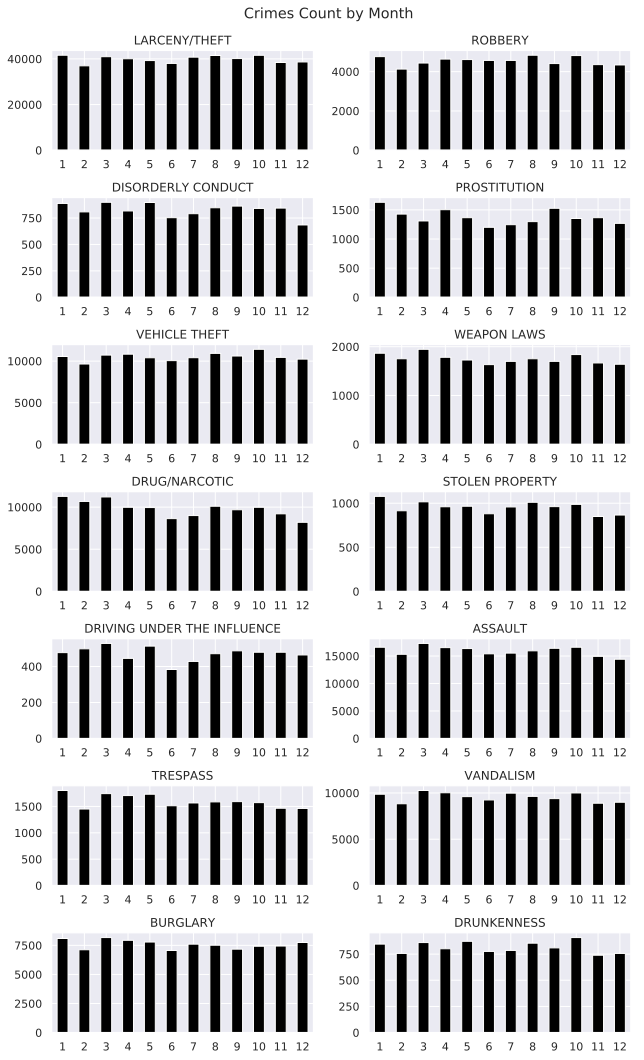

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9,15))
fig.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.94)
fig.suptitle("Crimes Count by Month")

for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    countByMonth_CT = df_CT.groupby(df['Date'].dt.month).count()["PdId"]
    axs = countByMonth_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], legend=None, rot=0, color="black")
    axs.xaxis.set_label_text("")
plt.show()

*Taking months as a cycle, it can be found that many crimes are slightly reduced in winter. Especially in November and December, many crimes like `STOLEN PROPERTY` were **significantly reduced**. Many types of crime data have the same pattern of fluctuation that **reach a trough** in June and July. 

Generally, it seems that the incidents reported are related to the days of months except December, which has 31 days but the count is smaller than all of the months that have 30 days. This might indicate several things - one thing we could speculate, is whether the active police force is reduced during the christmas holidays, meaning that in general, less incidents are reported or followed up on. Maybe, it also be caused by more people spending time at home (i.e in their apartments)*

***Exercise 1.3***

*The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.*

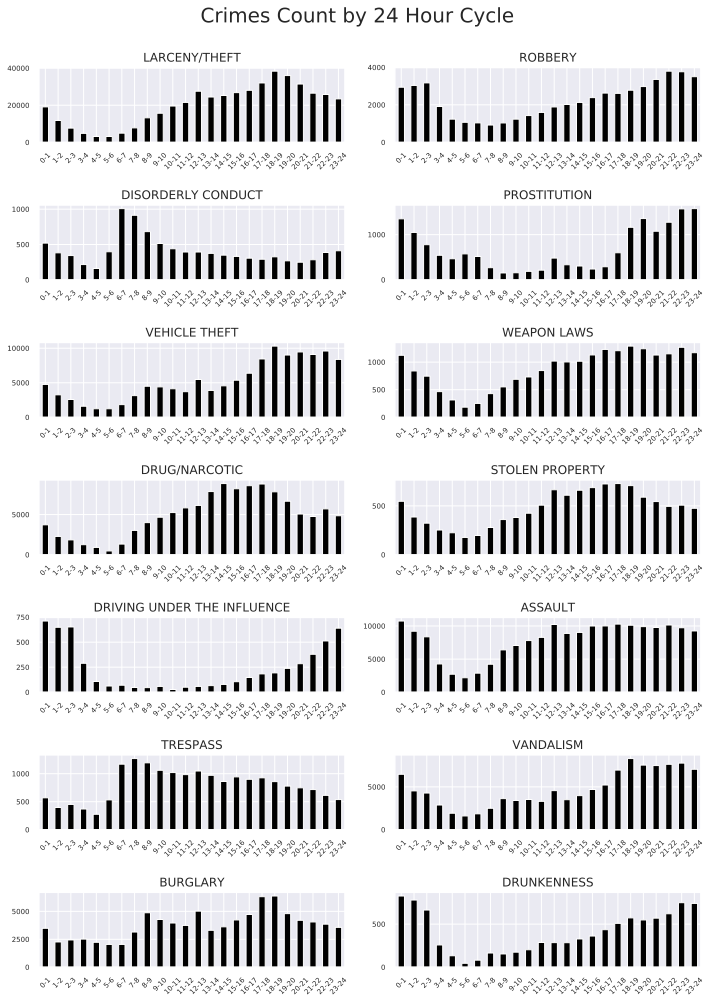

In [67]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,14))
fig.tight_layout(h_pad=6)
fig.subplots_adjust(top=0.92)
fig.suptitle("Crimes Count by 24 Hour Cycle", fontsize=20)

xticklabels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23','23-24']
df['Time'] = pd.to_datetime(df['Time'])
for i, crime_type in enumerate(focuscrimes):
    df_CT = df[df['Category'] == crime_type]
    countByHour_CT = df_CT.groupby(df['Time'].dt.floor('1H')).count()["PdId"]
    axs = countByHour_CT.plot(kind='bar', title=crime_type, ax=axes[i//2, i%2], legend=None, rot=45, color="black", fontsize=7)
    axs.set_xticklabels(xticklabels, fontsize=7)
    axs.xaxis.set_label_text("", fontsize=10)
plt.show()

*For most types of crime, they reach the lowest amount of incidents reported around 4-6 am in the morning. This makes sense, since this is where less people is on the street, ergo less incidents are reported. One surprising trend here, is that around 6 am, `TRESPASS`ing goes tremendously up. This is not something that can be confirmed, we do however speculate that this may be caused by homeless people sleeping 'in the wrong places'. They get reported by the police, and get kicked out.*

*Other than that, it is obvious to see that `DRUNKENNESS` follows similiar patterns such as `VANDALISM`, `DRIVING UNDER THE INFLUENCE`, and `PROSTITUTION`. This may again confirm that as more people get drunk, there is a tendency to be a spike in reported incidents.*

*Whilst these reports may suggest that it is safer to be on the street from 4-6 am, rather than any other time, there is a factor that is yet to be factored in: since there are a lot less people on the street, there might be more incidents pr. person on the street. This cannot be concluded from the data, but in no way does it warrant it to be safer in the early hours of the day.*

*Furthermore, it seems that `ASSAULT`s could be determined by two factors (This is speculative, not a fact). One of them could be the fact that it simply rises as soon as more people are on the streets to commit and report `ASSUALT`s. The next one seems that `DRUNKENNESS` also affects it, keeping it high until around 2-3 am.*

***Exercise 1.4***

*Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.*

In [70]:
policing_dataframe = pd.read_csv('rawdata/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=[['Date', 'Time']])

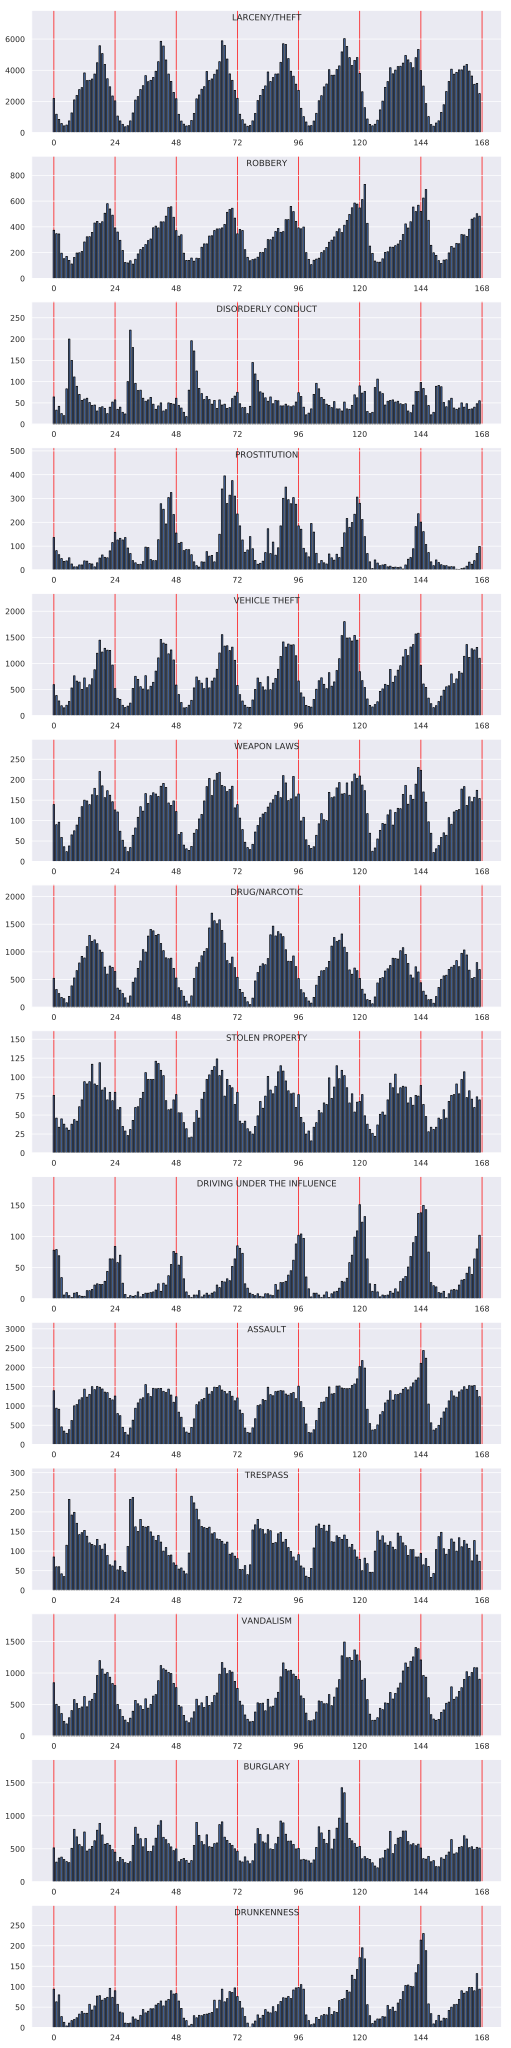

In [73]:
policing_dataframe["HourOfWeek"] = policing_dataframe["Date_Time"].dt.dayofweek * 24 + policing_dataframe["Date_Time"].dt.hour

counts_pr_category_pr_hour_pr_week = policing_dataframe.groupby(by=["HourOfWeek", "Category"]).size().reset_index(name="counts")

counts_pr_category_pr_hour_pr_week = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]
x_position = [0,24,48,72,96,120,144,168]
#x_position_minor = [12,36,60,84,108,132,156]
plt.figure(figsize=(10,40))

crimes = list(focuscrimes)
for i in range(len(focuscrimes)):
    temp = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'] == crimes[i]].reset_index(drop=True)
    x = temp["HourOfWeek"]
    y = temp["counts"]
    plt.subplot(len(crimes),1,i+1)
    plt.title(crimes[i], pad=-14)
    plt.bar(x, y, width=0.6, edgecolor="black")
    plt.xticks(x_position, x_position)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))
    plt.grid(which="major", axis="x", color="red")
    plt.grid(which="minor", axis="x", color="gray")
    
plt.show()

*Whilst for most crime types the pattern is the same over the 24 hours, there is a massive difference in the peak values. For instance with `BURGLARIES`, we see that there is a massive peak on the Friday, just around 6 pm, when people get home from work. That is ofcourse because most `BURGLARIES` are not reported until the owner gets home. However, the peak on Fridays may affect the following days greatly, like in a **Exercise 1.3**, where the data was grouped over 24 hours, for all days*

*Another interesting finding: with `ASSAULT`s, we found that it is most often reported on Saturdays, and Sundays. We found this odd, since Sunday is not a "drinking day", meaning that there was a spike without people being intoxicated. In the above plot, it is obvious that cases that are reported to happen on the Sunday is happening on the Saturday, just after mid-night. Whilst this is not wrong, theoretically, this could be a place where human interpretation could cause a faulty planning of police force. If someone looks at the plot from **Exercise 1.1**, they will be lead to believe that there should be more police force present on Sundays, to prevent `ASSAULT`s. If this is done mindlessly, you might create an inefficient workplan.*

# PART 2 - Thinking about data and visualization

***Exercise 2.1***

*As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?*

*Pearson correlation r shows the linear relationship between two sets of data. The closer the r value is to 1, the stronger the positive linear correlation is between the two datasets. The closer it is to -1, the higher the negative linear correlation is.*

$$
r = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{\sqrt{[n\sum{x^2} - (\sum{x})^2][n\sum{y^2} - (\sum{y})^2]}}
$$

*In general the pearson correlation handles some things poorly: like non-linear relationships - which occurs all the time in the natural world.*
*Furthermore, the pearson correlation has a tendency to be greatly affected by outliers - they can both create a correlation that isn't there, or deduct that there is no correlation because of one point that is marginally different from the sample.*

***Exercise 2.2***

*What is the difference between a bar-chart and a histogram?*

*1. Histograms are used to show the distribution of variables whereas bar charts compare several variables*

*2. Histograms bins data while bar charts are categorical*

***Exercise 2.3***

*I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.*

*There are a few ways (Quantative & Qualitative) to do it. One method we thought sounds cool is the Sturge's Rule (It has been critized for over smoothing histograms). It's more a rule of thumb than a perfect formula. K estimates the bin sizes:*

&emsp;
$$K = 1 + 3.322 log_{n}$$
&emsp;&emsp;

*Supposedly it works best for continous data which is normally distributed and symmetrical* ([source](https://www.statisticshowto.com/choose-bin-sizes-statistics/))

# PART 3 - Generating important plot types

***Exercise 3.1***

*First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.*

*We assign a mask to select all the data in February 2013*

In [74]:
mask = (policing_dataframe['Date_Time'] > "2013-02-01") & (policing_dataframe['Date_Time'] <= "2013-06-28")
df_assaults = policing_dataframe.loc[mask].reset_index(drop=True)

*We specifically select the crimes of category == ASSAULT*

In [75]:
df_assaults = df_assaults.loc[df_assaults['Category'] == "ASSAULT"].reset_index(drop=True)

*We filter the data that happened from 21:00 - 22:00*

In [76]:
hours_in_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hours_in_day)):
    if i+1 == len(hours_in_day):
        from_time = hours_in_day[i]
        to_time = hours_in_day[0]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    else:
        from_time = hours_in_day[i]
        to_time = hours_in_day[i+1]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)

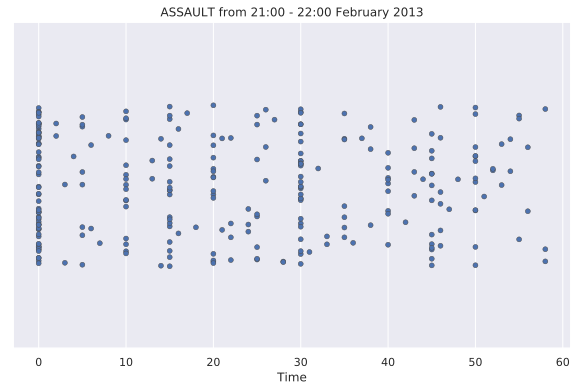

In [77]:
df_assaults["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_assaults['Date_Time'].dt.hour)]
df_assaults_filtered = df_assaults.loc[df_assaults['time_period'] == "21-22"].reset_index(drop=True)
x = df_assaults_filtered["Date_Time"].dt.minute
plt.figure(figsize=(10,6))
ax = sns.stripplot(x=x, jitter=0.25,linewidth=0.5)
plt.title('ASSAULT from 21:00 - 22:00 February 2013')
plt.xlabel('Time')
plt.show()

*It is obvious from this plot, that the police often round up to xx:00 or xx:30, as we see more points in this time span on the plot. If not registrered at a whole or half hour mark, then it is more likely to be registrered with a roundup/rounddown to the nearest 10 minutes. It is ofcourse hard to believe that crimes just happen like that, which makes us assume that the police do not register the EXACT time*

***Exercise 3.2***

*Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)*
- *This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)*
- *Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.*

*We create the necessary masks to filter the data from 2014-2-1 to 2014-7-31*

*We have chosen to look more into how the specified assignment would look for `BURGLARY` and `VEHICLE THEFT`*

In [78]:
df_vth = df[df['Category'] == 'VEHICLE THEFT']
mask = (df_vth['Date'] >= '2014-2-1') & (df_vth['Date'] <= '2014-7-31')
df_vth = df_vth.loc[mask]

df_bg = df[df['Category'] == 'BURGLARY']
mask = (df_bg['Date'] >= '2014-2-1') & (df_bg['Date'] <= '2014-7-31')
df_bg = df_bg.loc[mask]

*We now plot the incidents with their reported latitudes for the `BURGLARY` and `VEHICLE THEFT`*

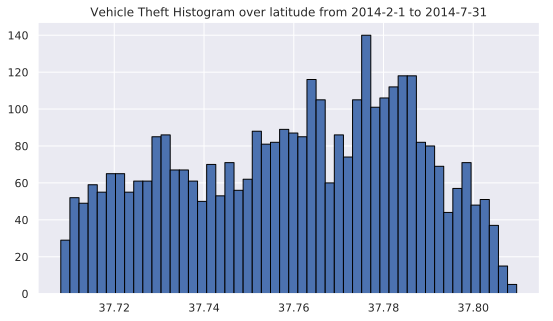

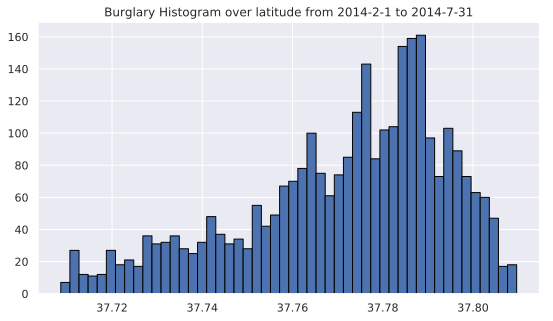

In [79]:
frq, edges = np.histogram(df_vth['Y'], bins=50)

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_title('Vehicle Theft Histogram over latitude from 2014-2-1 to 2014-7-31')

frq, edges = np.histogram(df_bg['Y'], bins=50)

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_title('Burglary Histogram over latitude from 2014-2-1 to 2014-7-31')
plt.show()

*From the histogram, `BURGLARIES` more often occur around the latitude of 37.79 - 37.795. In a further investigation, it would be interesting to see what makes this area more prone to `BURGLARIES`. For `VEHICLE THEFT` there is some concentration towards the 37.775 latitude, but in general the distribution is quite equal. Ofcourse one should consider that there are more people living/working in the areas with the more vehicle thefts. If we look up the latitude on [google maps](https://www.google.com/maps/search/san+francisco+latitude+longitude/@37.7793328,-122.4087591,17.33z), it is quite obvious that the incidents correspond well with the latitude of downtown San Francisco*

# PART 4

***Exercise 4.1***

*First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.*

In [92]:
import folium

sf_map = folium.Map([37.773972, -122.431297], tiles = "Stamen Toner", zoom_start=13)

sf_map

***Exercise 4.2***

*Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).*

In [93]:
folium.Marker([37.77919, -122.41914], icon=folium.Icon(color='blue'), popup='City Hall').add_to(sf_map)
sf_map

***Exercise 4.3***

*Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.*

*We create a mask to chose the data from 2016-6-1 to 2016-6-31*

*Then we plot the datapoints as red dots on the map. We avoid popups, as this is a lot of clutter on the map*

In [94]:
df_drug = df[df['Category'] == 'DRUG/NARCOTIC']
mask = (df_drug['Date'] >= '2016-6-1') & (df_drug['Date'] <= '2016-7-31')
df_drug = df_drug.loc[mask]

for i in df_drug.index:
    folium.CircleMarker([df_drug['Y'][i], df_drug['X'][i]], color="red", radius=1).add_to(sf_map)

sf_map

*From this, we observe that most cases are reported around downtown San Francisco*

# PART 5 - Errors in the data. The importance of looking at raw (or close to raw) data.

***Exercise 5.1***

*For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).*

***Why does `PROSTITUTION` go up so much in the mid-week, and what common misconceptions are there with data***

*From the data of week 2, it can be seen that prostitution is only high in 3 districts: Northern, Central, and Mission. This means that misconceptions might happen, if you assume that all districts have these issues on the middle of the week, as they are affecting the weekly trend of SF as a city.*

***Why is it a problem that crimes are reported more at the hour, or pr. 15 minutes***

*If you were to do a simple machine learning algorithm to.... say predict when a crime will happen - then it would be biased to say that it is going to happen on the hour. This is not a problem as long as we as a scientist recognizes this, but it is highly problematic if the data is just blindly trusted, and you do some machine learning on top of it - patterns will emerge where it is simply just laziness from the police officer's record that creates a pattern.*

***Why are there likely to be less sex offenses in the area around 800 Bryant St.***

*It might be that sex offenders choose not to commit crimes there - it is simply to risky with the heavy presence of police. But it might also be because if there is a police officer that violates that, no incident is filed, due to "protection of your own"*

***Find your own example of human noise in the data and visualize it***

*One thing that we noticed, is that it seem that there is not that many `DRUNKENNESS` incidents on friday's, as saturdays and sundays. This might lead us to believe that there are more incidents of people being publicly drunk on a sunday than a friday. Whilst that is theoretically true, it might shape the working hours of the police officers wrong - because the incidents happen after midnight on the same day.*

*We will now try to visualise this issue below*

In [98]:
focuscrimes = ['WEAPON LAWS',
               'PROSTITUTION',
               'DRIVING UNDER THE INFLUENCE',
               'ROBBERY',
               'BURGLARY',
               'ASSAULT',
               'DRUNKENNESS',
               'DRUG/NARCOTIC',
               'TRESPASS',
               'LARCENY/THEFT',
               'VANDALISM',
               'VEHICLE THEFT',
               'STOLEN PROPERTY',
               'DISORDERLY CONDUCT']

*We now filter the data by the day of the week that it happened*

In [105]:
policing_dataframe['DayOfWeek'] = policing_dataframe['Date_Time'].dt.weekday
counts_pr_category_pr_week = policing_dataframe.groupby(by=["DayOfWeek", "Category"]).size().reset_index(name="counts")
counts_pr_category_pr_week = counts_pr_category_pr_week.loc[counts_pr_category_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)

*We plot the data, to show how the binning works*

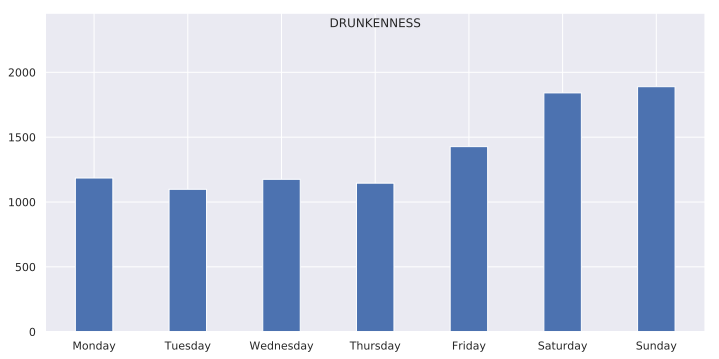

In [100]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))
temp = counts_pr_category_pr_week.loc[counts_pr_category_pr_week['Category'] == "DRUNKENNESS"].reset_index(drop=True)
x = temp["DayOfWeek"]
y = temp["counts"]
plt.title("DRUNKENNESS", pad=-14)
plt.bar(x, y, width=0.4)
plt.xticks(x, x_values)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

plt.show()

*Above it seems that there are MORE reported incidents of `DRUNKENNESS` on Sundays! We should make sure that our police force is ready here!*

*But let's just plot it over the hours of the week to see when it happens, just to be safe ;)*

In [106]:
policing_dataframe["HourOfWeek"] = policing_dataframe["Date_Time"].dt.dayofweek * 24 + policing_dataframe["Date_Time"].dt.hour
counts_pr_category_pr_hour_pr_week = policing_dataframe.groupby(by=["HourOfWeek", "Category"]).size().reset_index(name="counts")
counts_pr_category_pr_hour_pr_week = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)

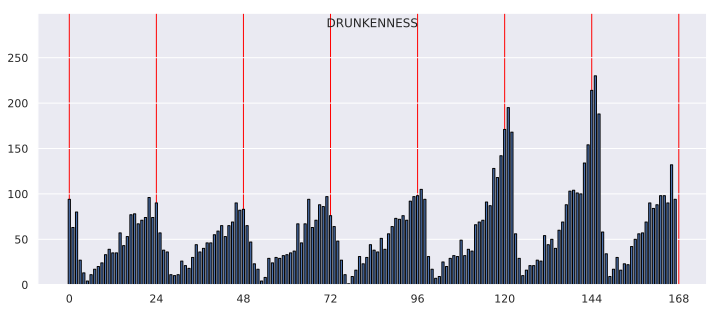

In [107]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]
x_position = [0,24,48,72,96,120,144,168]

plt.figure(figsize=(12,5))

temp = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'] == "DRUNKENNESS"].reset_index(drop=True)
x = temp["HourOfWeek"]
y = temp["counts"]
plt.title("DRUNKENNESS", pad=-14)
plt.bar(x, y, width=0.6, edgecolor="black")
plt.xticks(x_position, x_position)
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))
plt.grid(which="major", axis="x", color="red")
plt.grid(which="minor", axis="x", color="gray")

*The phenomenon can be seen on the above plot, where the 120'th and 144'th hour represents midnight of Friday and Saturday. The previous plot would say the largest police force should be on the streets on the Sunday, when in fact Sunday is one of the 'normal' days for `DRUNKENNESS`. If one is not careful with interpreting this data, you might come to the conclusion without the above plot that the police force should focus on `DRUNKENNESS` on Sundays. That is a problem, if the working hours are from 8-20 for the police officers, because then there will be too many people at work on Sunday, and too little on Friday!*